In [1]:
# IMPORTAMOS LIBRERIAS NECESARIAS
import numpy as np
import ast
import json
import seaborn as sns
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#from pandas_profiling import ProfileReport
import sweetviz as sw
from datetime import datetime

c:\Users\DauntLess\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Making the dataframe reading the csv file using an url from google drive

url = 'https://drive.google.com/file/d/1Px4Ufyb6m-o2E_4oefNyVjCrXvv2GiZQ/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df_origin = pd.read_csv(url, dtype={'column_name': str}, low_memory=False)


In [3]:
# Showing the first rows in the dataframe

df_origin.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,vote_count,collection_name,release_year,return,genres,production_companies,production_countries,spoken_languages,cast,crew
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,5415.0,Toy Story Collection,1995,12.451801,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['United States of America'],['English'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,2413.0,NaN,1995,4.043035,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"['English', 'Français']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Larry J. Franco
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,92.0,Grumpy Old Men Collection,1995,0.000000,"['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']",['United States of America'],['English'],"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,34.0,NaN,1995,5.090760,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],['United States of America'],['English'],"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,173.0,Father of the Bride Collection,1995,0.000000,['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],['English'],"['Steve Martin', 'Diane Keaton', 'Martin Short...",Alan Silvestri


In [4]:
# Showing the statistics of the numeric columns in the dataframe

df_origin.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.537500e+04,45375.000000,45375.000000,4.537500e+04,45129.000000,45375.000000,45375.000000,45375.000000,4.537500e+04
mean,4.232698e+06,108020.627879,2.926713,1.123035e+07,94.183762,5.624194,110.098821,1991.880639,6.600573e+02
std,1.744004e+07,112161.132869,6.009977,6.439064e+07,38.338920,1.915262,491.748040,24.055336,7.469412e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26385.500000,0.388835,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59857.000000,1.130406,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156472.000000,3.691946,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


In [5]:
# Looking the total amount of null values

df_origin.isnull().sum()

budget                      0
id                          0
original_language          11
overview                  941
popularity                  0
release_date                0
revenue                     0
runtime                   246
status                     80
tagline                 24977
title                       0
vote_average                0
vote_count                  0
collection_name         40887
release_year                0
return                      0
genres                      0
production_companies        0
production_countries        0
spoken_languages            0
cast                        0
crew                        0
dtype: int64

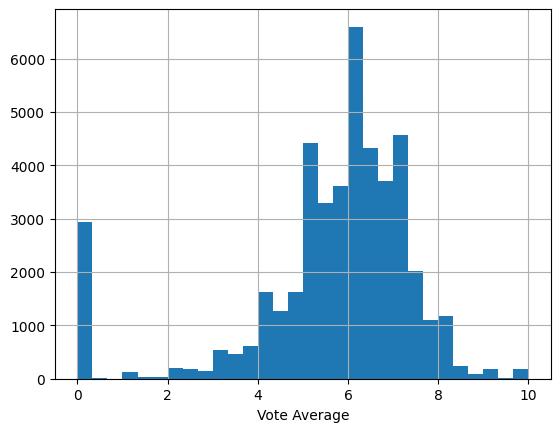

In [6]:
# Showing Histogram of the column 'vote_average'

df_origin['vote_average'].hist(bins=30)
plt.xlabel('Vote Average')
plt.show()

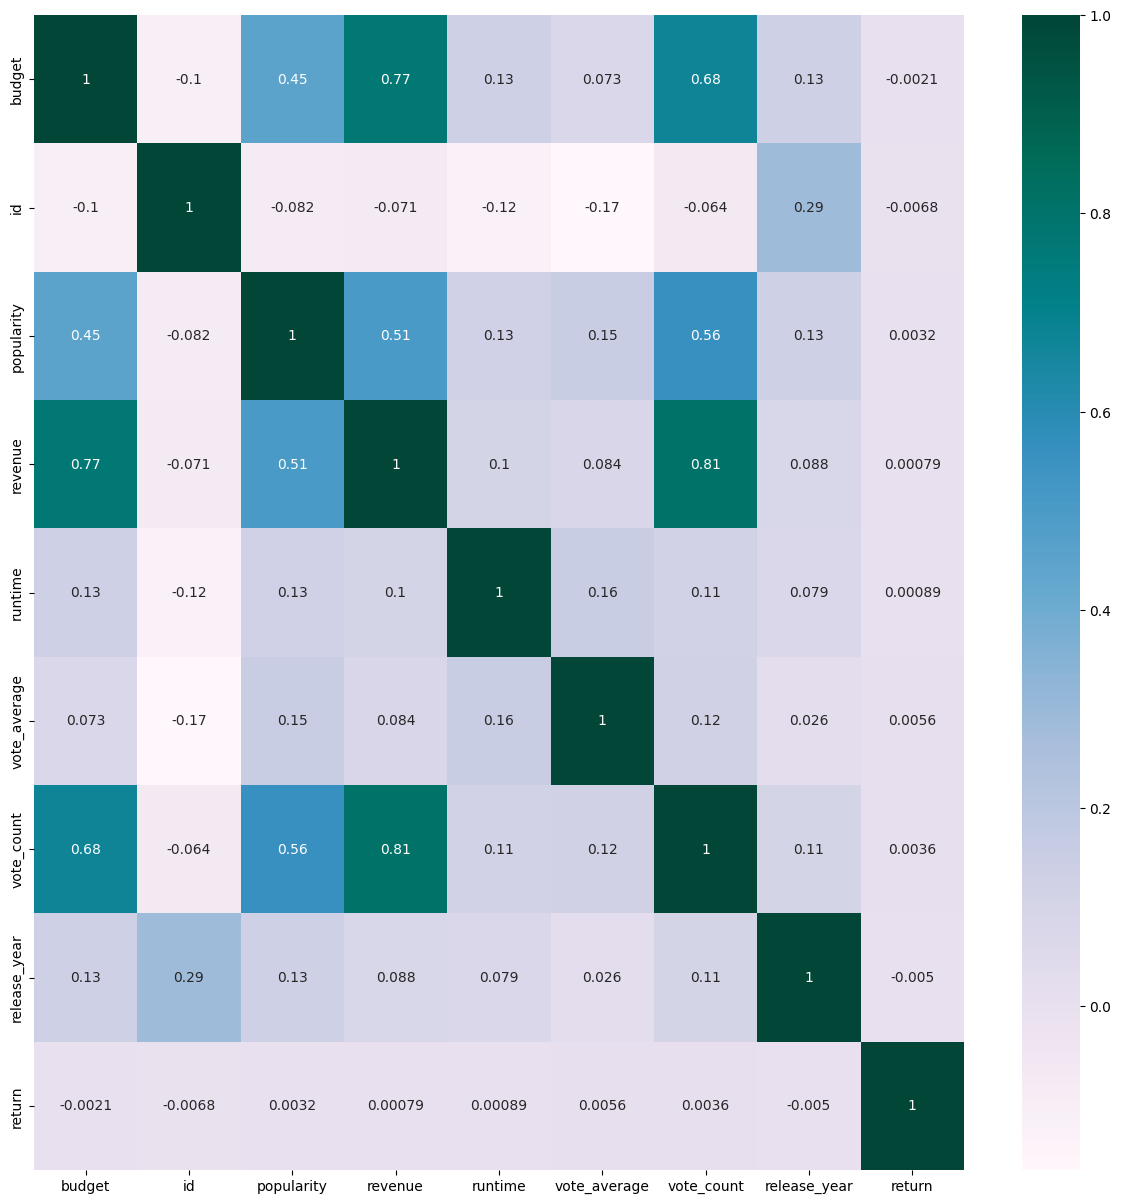

In [7]:
# Making a correlation Matrix to see what columns are more related

df_aux = df_origin[['budget', 'id','popularity','revenue', 'runtime',
                    'vote_average', 'vote_count', 'release_year', 'return']]

corr_matrix = df_aux.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True , cmap='PuBuGn')
plt.show()

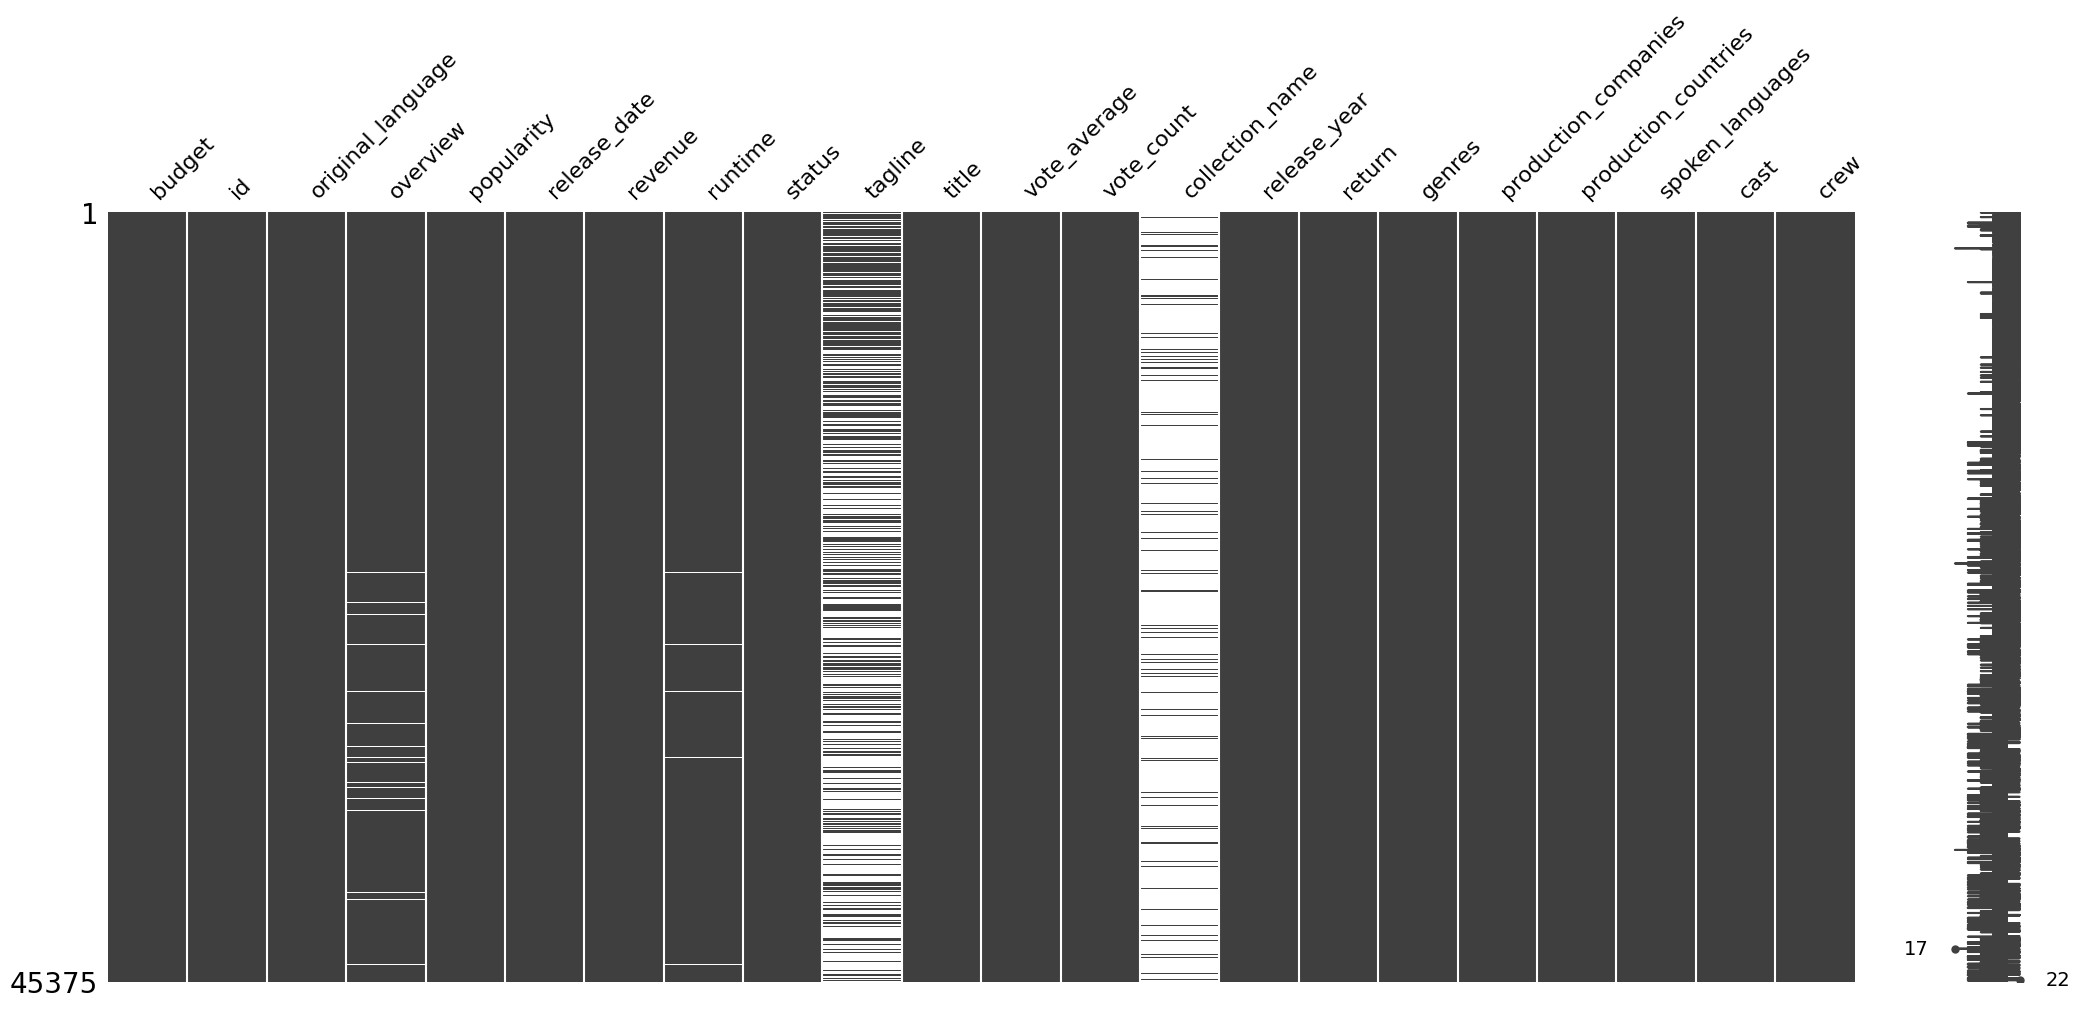

In [8]:
# Using a new librarie to see more visually the missing values

msno.matrix(df_origin)
plt.show()

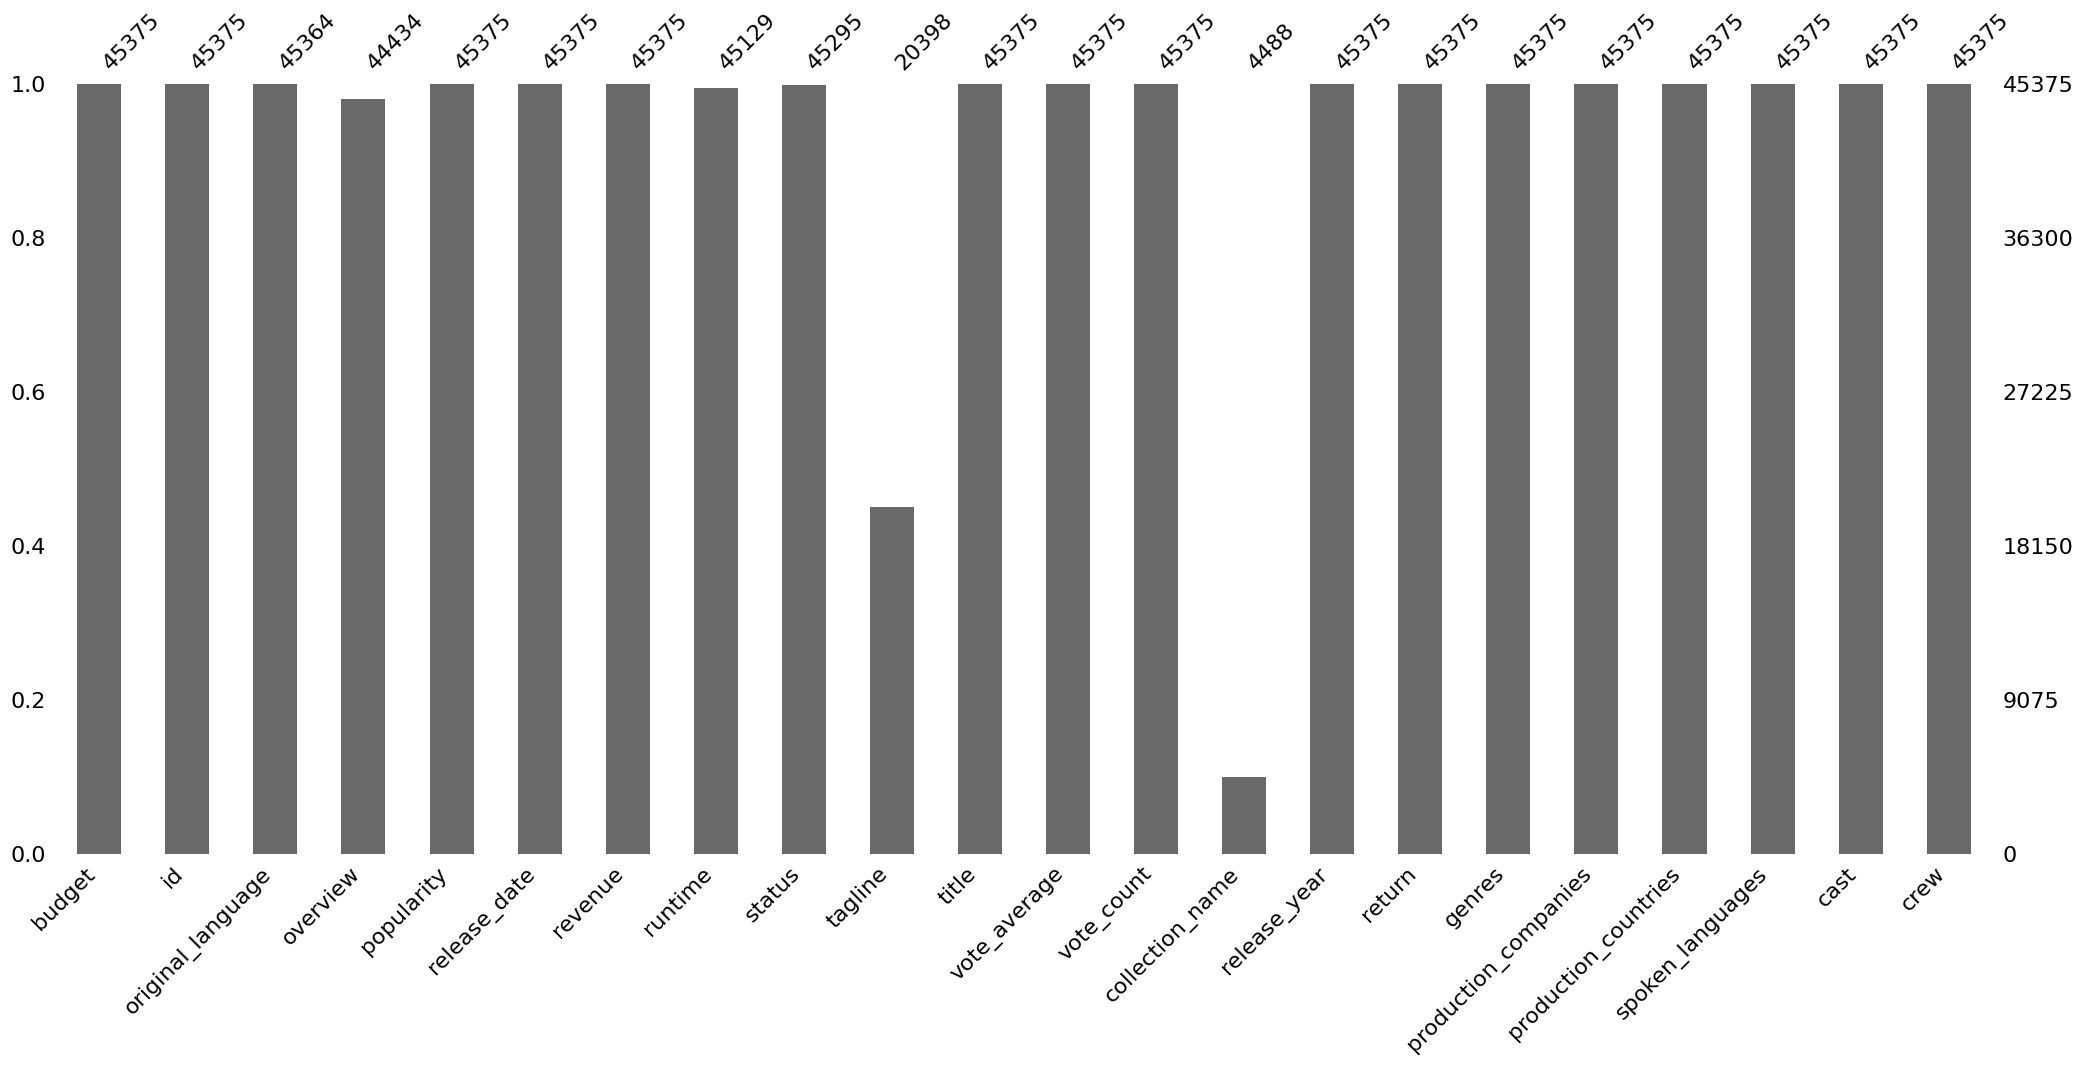

In [9]:
# Using a new librarie to see more visually the missing values

msno.bar(df_origin)
plt.show()

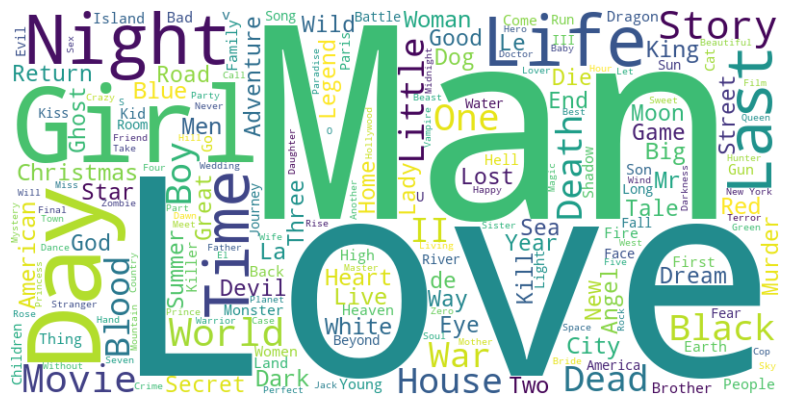

In [10]:
# Joinig all the titles
titles = ' '.join(df_origin['title'])

# Making a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)

# Showing the wordcloud of titles
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

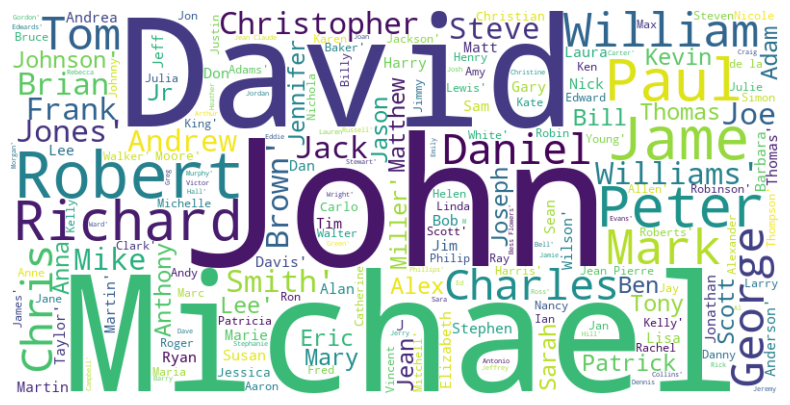

In [11]:
# Joinig all the actors
actores_filtrados = df_origin['cast'].dropna()
titles = ' '.join(actores_filtrados)

# Making a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)

# Showing the wordcloud of actors
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

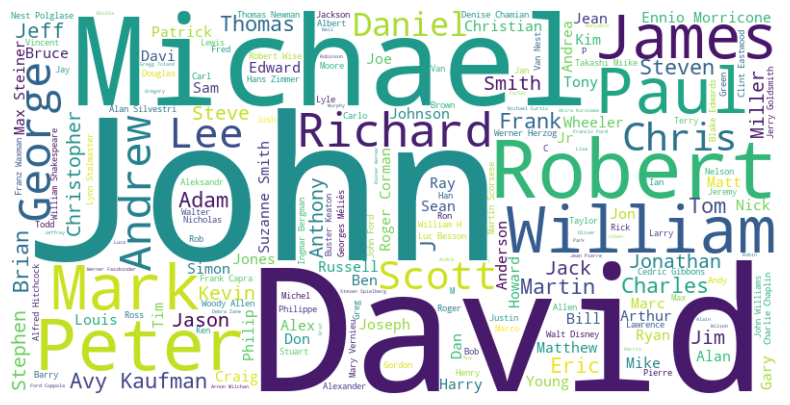

In [12]:
# Joinig all the Directors in Crew
df_crew = df_origin[df_origin['crew'] != 'No Director']
actores_filtrados = df_crew['crew'].dropna()

titles = ' '.join(actores_filtrados)

# Making a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)

# Showing the wordcloud of directors
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()